## TensorFlow: Linear Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

### Training Data

In [3]:
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

### TensorFlow Graph Input

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

### Construct a linear model

In [5]:
pred = tf.add(tf.multiply(X, W), b)

### Define Cost and Optimizer

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Initialize the variables (i.e. assign their default value)

In [7]:
init = tf.global_variables_initializer()

### Start training

Epoch: 0050 cost= 0.202218801 W= 0.44745082 b= -0.62190473
Epoch: 0100 cost= 0.187749356 W= 0.43568334 b= -0.53724986
Epoch: 0150 cost= 0.174951002 W= 0.4246157 b= -0.45763028
Epoch: 0200 cost= 0.163630500 W= 0.41420627 b= -0.3827455
Epoch: 0250 cost= 0.153617457 W= 0.404416 b= -0.31231457
Epoch: 0300 cost= 0.144760907 W= 0.39520794 b= -0.24607307
Epoch: 0350 cost= 0.136927262 W= 0.3865476 b= -0.18377104
Epoch: 0400 cost= 0.129998416 W= 0.37840235 b= -0.12517428
Epoch: 0450 cost= 0.123869941 W= 0.37074143 b= -0.07006253
Epoch: 0500 cost= 0.118449420 W= 0.36353624 b= -0.01822863
Epoch: 0550 cost= 0.113655053 W= 0.3567595 b= 0.030522527
Epoch: 0600 cost= 0.109414585 W= 0.35038584 b= 0.076374285
Epoch: 0650 cost= 0.105664074 W= 0.3443912 b= 0.11949901
Epoch: 0700 cost= 0.102346919 W= 0.33875322 b= 0.16005869
Epoch: 0750 cost= 0.099413075 W= 0.33345044 b= 0.19820622
Epoch: 0800 cost= 0.096818253 W= 0.32846305 b= 0.23408516
Epoch: 0850 cost= 0.094523326 W= 0.32377225 b= 0.26783028
Epoch: 09

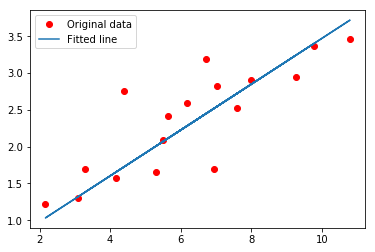

In [8]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Source: [Linear Regression Example by Aymeric Damien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb)